In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('D:\\Users\\flammmes\\Downloads\\Book1.csv')
df['d']=df['d'].str.replace(',','')
df['Rsob']=df['Rsob'].str.replace(',','')
dfn = pd.read_csv('D:\\Users\\flammmes\\Downloads\\Fluids data.csv')


dd = df.d.astype('float')
df.d = df.d.astype('float')
df['Rsob']= df['Rsob'].astype('float')
df.Rsob[df.Rsob<0] = 0
#df['Rsob']= np.abs(df['Rsob'])
x = df.iloc[:,1]/df.iloc[:,8]
mu = 1000*(df.iloc[:,3]*x*x+df.iloc[:,4]*x+df.iloc[:,5])/(df.iloc[:,6]*x+1)
df.insert(9,'μob',mu)
df.insert(12,'Tr',dfn.Tres)

df = df[df['μob']<=50] #50,338

C:\Users\flammmes\AppData\Local\Temp/ipykernel_6480/2702052333.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Rsob[df.Rsob<0] = 0


In [4]:
def gen_func(a):
    
    dflist = []
    for i in range(len(a)):
        
        correlations_select = pd.DataFrame({'P':P_i,'μ':mu_i,'Rsob':instance[10],'API':instance[11],'Tr':instance[12]})
        pressure_bubble_point = correlations_select.iloc[0,0]*np.linspace(1,1,20)
        visc_bubble_point = correlations_select.iloc[0,1]*np.linspace(1,1,20)
        correlations_select.insert(0,"Pb",pressure_bubble_point)
        correlations_select.insert(2,'μob',visc_bubble_point)
        dflist.append(correlations_select)
        
    
    totaldf = pd.concat(dflist)
    totaldf.Pb = totaldf.Pb*145.038
    totaldf.P = totaldf.P*145.038
    totaldf.insert(2,'ΔP', totaldf.P-totaldf.Pb)
    
    totaldf.API = 141.5*1000/totaldf.API -131.5
    totaldf.Rsob = totaldf.Rsob*5.614583333333333
    #totaldf.drop('P',axis=1,inplace=True)
    return totaldf

In [5]:
totaldf =gen_func(df)
totaldf1 = totaldf[totaldf.Tr.notnull().values & totaldf.API.notnull().values]
totaldf2 = totaldf[totaldf.API.notnull().values]
totaldf3 = totaldf[totaldf.Rsob.notnull().values & totaldf.API.notnull().values]
totaldf4 = totaldf[totaldf.Rsob.notnull().values]


In [6]:
a = 10.313*np.log10(totaldf.Tr)-36.447
μod = 3.141*np.power(10,10.0)*np.power(totaldf.Tr,-3.444)*np.power(np.log10(totaldf.API),a)

#a = np.power(10,3.0324-0.02023)*totaldf.API
#μod = np.power(10,a*np.power(totaldf.Tr,-1.163))-1
#a=np.power(10,0.42+8.33/totaldf.API)
#μod = 0.32+18*np.power(10,7.0)/np.power(totaldf.API,4.53)*np.power(360/(totaldf.Tr+200),a)
totaldf.insert(8,'μod',μod)

In [7]:
totaldf

,Pb,P,ΔP,μob,μ,Rsob,API,Tr,μod
0,1225.002551,1225.002551,0.000000,2.373815,2.373815,NaN,32.155010,365.150,0.769950
1,1225.002551,1424.476671,199.474120,2.373815,2.403167,NaN,32.155010,365.150,0.769950
2,1225.002551,1623.950791,398.948240,2.373815,2.448781,NaN,32.155010,365.150,0.769950
3,1225.002551,1823.424912,598.422361,2.373815,2.497706,NaN,32.155010,365.150,0.769950
4,1225.002551,2022.899032,797.896481,2.373815,2.547857,NaN,32.155010,365.150,0.769950
...,...,...,...,...,...,...,...,...,...
15,4560.009224,7287.647287,2727.638063,0.578429,0.628827,1363.922656,34.424015,388.706,0.576164
16,4560.009224,7469.489824,2909.480601,0.578429,0.633034,1363.922656,34.424015,388.706,0.576164
17,4560.009224,7651.332362,3091.323138,0.578429,0.637304,1363.922656,34.424015,388.706,0.576164
18,4560.009224,7833.174899,3273.165676,0.578429,0.641632,1363.922656,34.424015,388.706,0.576164


In [8]:
x=totaldf.copy()
x.insert(0,'m',np.nan)
        #Labedi Libya(1982)
mu1 = x.μob +np.power(x.μod,0.9036)*np.power(x.Pb,0.6151)/np.power(10,2.488+0.01976*x.API)*(x.P/x.Pb-1)
        #Labedi Nigeria(1982)
mu2 = x.μob+0.0483*np.power(x.μod,0.7374)*(x.P/x.Pb-1)
        #Al-Khafaji(1987)
X = -0.3806-0.1845*x.API+0.004034*np.power(x.API,2.0)-3.716*np.power(10,-5.0)*np.power(x.API,3.0)
mu3 = x.μob +np.power(10,X+1.11*np.log10(0.07031*(x.P-x.Pb)))
        #Abdul-Majeed(1990)
X = 1.9311-0.89941*np.log(x.Rsob)-0.001194*np.power(x.API,2.0)+0.0092545*x.API*np.log(x.Rsob)
mu4 = x.μob+1000*np.power(10,X-5.2106+1.11*np.log10(6.894757*(x.P-x.Pb)))
        #De Ghetto(1994)
x.m[x.API<=10] = x.μob[x.API<=10]-(1-x.P[x.API<=10]/x.Pb[x.API<=10])*np.power(10,-2.19)*np.power(x.μod[x.API<=10],1.055)*np.power(x.Pb[x.API<=10],0.3132)/np.power(10,0.0099*x.API[x.API<=10])
x.m[(10<=x.API) & (x.API<=22.3)]  = 0.9886*x.μob[(10<=x.API) & (x.API<=22.3)]+0.002763*(x.P[(10<=x.API) & (x.API<=22.3)]-x.Pb[(10<=x.API) & (x.API<=22.3)])*(-0.01153*np.power(x.μob[(10<=x.API) & (x.API<=22.3)],1.7933)+0.0316*np.power(x.μob[(10<=x.API) & (x.API<=22.3)],1.5939))
x.m[(22.3<=x.API) & (x.API<=31.1)] = x.μob[(22.3<=x.API) & (x.API<=31.1)]-(1-x.P[(22.3<=x.API) & (x.API<=31.1)]/x.Pb[(22.3<=x.API) & (x.API<=31.1)])*np.power(10,-3.8055)*np.power(x.Pb[(22.3<=x.API) & (x.API<=31.1)],0.6957)*np.power(x.μod[(22.3<=x.API) & (x.API<=31.1)],1.4131)/np.power(10,-0.00288*x.API[(22.3<=x.API) & (x.API<=31.1)])
#x.m[x.API>=31.1] = x.μob[x.API>=31.1]-(1-x.P[x.API>=31.1]/x.Pb[x.API>=31.1])*np.power(10,-1.9)*np.power(x.Pb[x.API>=31.1],0.5026)*np.power(x.μod[x.API>=31.1],0.7423)/np.power(10,-0.00243*x.API[x.API>=31.1])
mu5 = x.m
        #Almehaideb(1997)
mu6 = x.μob*np.power(x.P/x.Pb,0.134819+1.94345*np.power(10,-4.0)*x.Rsob-1.93106*np.power(10,-9.0)*np.power(x.Rsob,2))
        #Elsharkawy(1999)
mu7 = x.μob+np.power(10,-2.0771)*(x.P-x.Pb)*np.power(x.μod,1.19279)/np.power(x.μob,0.40712)/np.power(x.Pb,0.7941)
        #Dindoruk and Christman(2001)
X = 0.776644115+0.987658646*np.log10(x.μob)-0.190564677*np.log10(x.Rsob)+0.009147711*x.μob*np.log10(x.Rsob)-0.000019111*(x.P-x.Pb)
mu8 = x.μob +0.00006334*x.ΔP*np.power(10,X)





C:\Users\flammmes\AppData\Roaming\Python\Python310\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\flammmes\AppData\Roaming\Python\Python310\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [9]:
totaldf = pd.DataFrame({'P':x['P'],'μ':x['μ'],'Pb':x.Pb,'μob':x.μob,'μod':x.μod,'μ1':mu1,
                        'μ2':mu2,'μ3':mu3,'μ4':mu4,'μ5':mu5,'μ6':mu6,'μ7':mu7,'μ8':mu8,'Rs':x.Rsob,'API':x.API })


In [10]:
totaldf

,P,μ,Pb,μob,μod,μ1,μ2,μ3,μ4,μ5,μ6,μ7,μ8,Rs,API
0,1225.002551,2.373815,1225.002551,2.373815,0.769950,2.373815,2.373815,2.373815,NaN,NaN,2.373815,2.373815,NaN,NaN,32.155010
1,1424.476671,2.403167,1225.002551,2.373815,0.769950,2.381494,2.380301,2.381674,NaN,NaN,NaN,2.376851,NaN,NaN,32.155010
2,1623.950791,2.448781,1225.002551,2.373815,0.769950,2.389173,2.386787,2.390778,NaN,NaN,NaN,2.379886,NaN,NaN,32.155010
3,1823.424912,2.497706,1225.002551,2.373815,0.769950,2.396851,2.393273,2.400420,NaN,NaN,NaN,2.382921,NaN,NaN,32.155010
4,2022.899032,2.547857,1225.002551,2.373815,0.769950,2.404530,2.399759,2.410429,NaN,NaN,NaN,2.385957,NaN,NaN,32.155010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,7287.647287,0.628827,4560.009224,0.578429,0.576164,0.622369,0.597668,0.694991,0.650465,NaN,0.696538,0.596806,0.718507,1363.922656,34.424015
16,7469.489824,0.633034,4560.009224,0.578429,0.576164,0.625298,0.598951,0.703648,0.655815,NaN,0.703374,0.598031,0.726655,1363.922656,34.424015
17,7651.332362,0.637304,4560.009224,0.578429,0.576164,0.628227,0.600233,0.712364,0.661202,NaN,0.710111,0.599256,0.734664,1363.922656,34.424015
18,7833.174899,0.641632,4560.009224,0.578429,0.576164,0.631157,0.601516,0.721137,0.666623,NaN,0.716752,0.600481,0.742536,1363.922656,34.424015


In [11]:
def Stats_matrix(a):
    average_error = []
    standard_deviation = []
    absolute_average_error = []
    absolute_standard_deviation =[]
    for i in range(8):
        average_error.append(np.average((a.iloc[:,i+5][a.iloc[:,i+5].notnull().values]-a.μ[a.iloc[:,i+5].notnull().values])/a.μ[a.iloc[:,i+5].notnull().values]*100))
        standard_deviation.append(np.std((a.iloc[:,i+5][a.iloc[:,i+5].notnull().values]-a.μ[a.iloc[:,i+5].notnull().values])/a.μ[a.iloc[:,i+5].notnull().values]*100))
        absolute_average_error.append(np.average(np.absolute((a.iloc[:,i+5][a.iloc[:,i+5].notnull().values]-a.μ[a.iloc[:,i+5].notnull().values])/a.μ[a.iloc[:,i+5].notnull().values]*100)))
        absolute_standard_deviation.append(np.std(np.absolute((a.iloc[:,i+5][a.iloc[:,i+5].notnull().values]-a.μ[a.iloc[:,i+5].notnull().values])/a.μ[a.iloc[:,i+5].notnull().values]*100)))
    statistics  = pd.DataFrame(list(zip(average_error,standard_deviation,absolute_average_error,
                                        absolute_standard_deviation)),columns = ['% AE','% Std Dev AE','%AAE','% Std Dev AAE'],index = ['Labedi Libya(1982)','Labedi Nigeria(1982)','Al-Khafaji(1987)','Abdul-Majeed(1990)','De Ghetto(1994)','Almehaideb(1997)','Elsharkawy(1999)','Dindoruk and Christman(2001)'])
    return statistics

Stats_matrix(totaldf)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
Labedi Libya(1982),-7.505937,8.274091,7.833435,7.964732
Labedi Nigeria(1982),-8.106470,9.188428,8.847940,8.476793
Al-Khafaji(1987),-4.325842,12.090407,7.297692,10.565725
Abdul-Majeed(1990),18.332503,159.168463,24.048028,158.405722
De Ghetto(1994),-5.474282,9.778127,7.998285,7.849011
Almehaideb(1997),2.865199,11.486479,6.642839,9.799044
Elsharkawy(1999),-9.271448,8.779672,9.307459,8.741487
Dindoruk and Christman(2001),5.500524,12.958600,7.129909,12.138595


In [12]:
visc_0_1 = totaldf.loc[(totaldf.μob<1) & (totaldf.μob>0)]
Stats_matrix(visc_0_1)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
Labedi Libya(1982),-5.663002,5.898867,5.894963,5.667065
Labedi Nigeria(1982),-6.112048,6.589210,6.626231,6.071893
Al-Khafaji(1987),-0.225992,11.019233,4.823055,9.910232
Abdul-Majeed(1990),1.975652,14.917406,6.672426,13.487436
De Ghetto(1994),-5.557400,5.576057,5.562749,5.570721
Almehaideb(1997),4.469823,11.731666,6.414703,10.791797
Elsharkawy(1999),-6.660938,5.861526,6.712626,5.802260
Dindoruk and Christman(2001),2.142794,5.783243,4.313825,4.407764


In [13]:
visc_1_5 = totaldf.loc[(totaldf.μob>1) & (totaldf.μob<5)]
Stats_matrix(visc_1_5)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
Labedi Libya(1982),-7.217910,7.357865,7.647162,6.910667
Labedi Nigeria(1982),-7.413742,9.444263,9.170772,7.749491
Al-Khafaji(1987),-7.060542,7.409175,7.510909,6.952221
Abdul-Majeed(1990),47.526667,240.787545,50.671606,240.145402
De Ghetto(1994),-7.459898,8.691054,8.571196,7.597308
Almehaideb(1997),2.389494,9.891124,6.523979,7.809079
Elsharkawy(1999),-9.981070,7.887591,9.981070,7.887591
Dindoruk and Christman(2001),5.394042,7.038372,6.400244,6.137691


In [14]:
visc_5_20 = totaldf.loc[(totaldf.μob>5) & (totaldf.μob<20)]
Stats_matrix(visc_5_20)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
Labedi Libya(1982),-12.714231,10.688650,13.445359,9.753012
Labedi Nigeria(1982),-14.788108,9.977928,14.894080,9.819041
Al-Khafaji(1987),-14.195323,10.516693,14.502656,10.088658
Abdul-Majeed(1990),37.598732,270.203994,46.882197,268.748810
De Ghetto(1994),-4.010634,11.491255,8.338659,8.865714
Almehaideb(1997),-1.709765,8.926027,6.174905,6.668418
Elsharkawy(1999),-16.307971,10.776755,16.345786,10.719313
Dindoruk and Christman(2001),10.893419,9.412985,11.369976,8.831451


In [15]:
visc_20_plus = totaldf.loc[(totaldf.μob>20) ]
Stats_matrix(visc_20_plus)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
Labedi Libya(1982),-23.826748,13.085925,23.826748,13.085925
Labedi Nigeria(1982),-24.933956,14.121232,24.933956,14.121232
Al-Khafaji(1987),-25.295624,13.685474,25.295624,13.685474
Abdul-Majeed(1990),54.851062,304.343433,85.313835,297.245881
De Ghetto(1994),-2.799874,7.406505,5.930974,5.245870
Almehaideb(1997),-7.585367,14.597580,13.013666,10.063380
Elsharkawy(1999),-26.255389,14.275540,26.255389,14.275540
Dindoruk and Christman(2001),50.875550,38.218021,50.875550,38.218021


In [16]:
def UndersatErrorPlot(a):
    models =  ['Labedi Libya(1982)','Labedi Nigeria(1982)','Al-Khafaji(1987)','Abdul-Majeed(1990)','De Ghetto(1994)','Almehaideb(1997)','Elsharkawy(1999)','Dindoruk and Christman(2001)']
    b = models.index(a)
    plt.scatter((totaldf.Pb),(totaldf.iloc[:,b+5]-totaldf.μ)/totaldf.μ*100,facecolors='none', edgecolors='b')
    plt.title(f'Undersaturated Oil Viscosity \n {a}')
    plt.xlabel('Bubble point pressure(Psia)')
    plt.ylabel('% Error')
    plt.figure(figsize=(12,8))

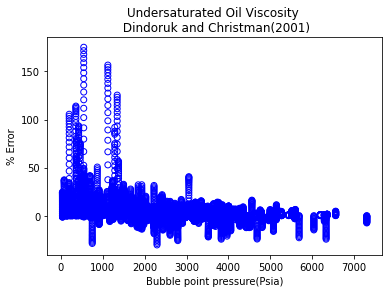

<Figure size 864x576 with 0 Axes>

In [17]:
UndersatErrorPlot('Dindoruk and Christman(2001)')

In [18]:
def UndersatViscPlot(a):
    models =  ['Labedi Libya(1982)','Labedi Nigeria(1982)','Al-Khafaji(1987)','Abdul-Majeed(1990)','De Ghetto(1994)','Almehaideb(1997)','Elsharkawy(1999)','Dindoruk and Christman(2001)']
    b = models.index(a)
    plt.scatter(totaldf.μ,totaldf.iloc[:,b+5],facecolors ='none', edgecolors='b')
    plt.title(f'Undersaturated Oil Viscosity \n {a}')
    plt.xlabel('Measured Viscosity(cp)')
    plt.ylabel('Calculated Viscosity(cp)')
    

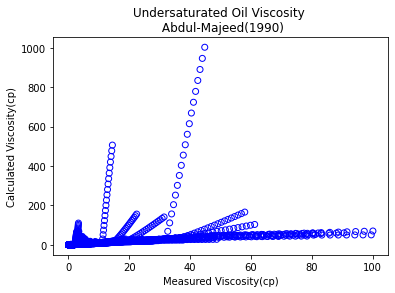

In [19]:
UndersatViscPlot('Abdul-Majeed(1990)')

In [20]:
totaldf

,P,μ,Pb,μob,μod,μ1,μ2,μ3,μ4,μ5,μ6,μ7,μ8,Rs,API
0,1225.002551,2.373815,1225.002551,2.373815,0.769950,2.373815,2.373815,2.373815,NaN,NaN,2.373815,2.373815,NaN,NaN,32.155010
1,1424.476671,2.403167,1225.002551,2.373815,0.769950,2.381494,2.380301,2.381674,NaN,NaN,NaN,2.376851,NaN,NaN,32.155010
2,1623.950791,2.448781,1225.002551,2.373815,0.769950,2.389173,2.386787,2.390778,NaN,NaN,NaN,2.379886,NaN,NaN,32.155010
3,1823.424912,2.497706,1225.002551,2.373815,0.769950,2.396851,2.393273,2.400420,NaN,NaN,NaN,2.382921,NaN,NaN,32.155010
4,2022.899032,2.547857,1225.002551,2.373815,0.769950,2.404530,2.399759,2.410429,NaN,NaN,NaN,2.385957,NaN,NaN,32.155010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,7287.647287,0.628827,4560.009224,0.578429,0.576164,0.622369,0.597668,0.694991,0.650465,NaN,0.696538,0.596806,0.718507,1363.922656,34.424015
16,7469.489824,0.633034,4560.009224,0.578429,0.576164,0.625298,0.598951,0.703648,0.655815,NaN,0.703374,0.598031,0.726655,1363.922656,34.424015
17,7651.332362,0.637304,4560.009224,0.578429,0.576164,0.628227,0.600233,0.712364,0.661202,NaN,0.710111,0.599256,0.734664,1363.922656,34.424015
18,7833.174899,0.641632,4560.009224,0.578429,0.576164,0.631157,0.601516,0.721137,0.666623,NaN,0.716752,0.600481,0.742536,1363.922656,34.424015


In [21]:
totaldf.insert(15,'ΔP',totaldf.P-totaldf.Pb)

In [22]:
totaldf

,P,μ,Pb,μob,μod,μ1,μ2,μ3,μ4,μ5,μ6,μ7,μ8,Rs,API,ΔP
0,1225.002551,2.373815,1225.002551,2.373815,0.769950,2.373815,2.373815,2.373815,NaN,NaN,2.373815,2.373815,NaN,NaN,32.155010,0.000000
1,1424.476671,2.403167,1225.002551,2.373815,0.769950,2.381494,2.380301,2.381674,NaN,NaN,NaN,2.376851,NaN,NaN,32.155010,199.474120
2,1623.950791,2.448781,1225.002551,2.373815,0.769950,2.389173,2.386787,2.390778,NaN,NaN,NaN,2.379886,NaN,NaN,32.155010,398.948240
3,1823.424912,2.497706,1225.002551,2.373815,0.769950,2.396851,2.393273,2.400420,NaN,NaN,NaN,2.382921,NaN,NaN,32.155010,598.422361
4,2022.899032,2.547857,1225.002551,2.373815,0.769950,2.404530,2.399759,2.410429,NaN,NaN,NaN,2.385957,NaN,NaN,32.155010,797.896481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,7287.647287,0.628827,4560.009224,0.578429,0.576164,0.622369,0.597668,0.694991,0.650465,NaN,0.696538,0.596806,0.718507,1363.922656,34.424015,2727.638063
16,7469.489824,0.633034,4560.009224,0.578429,0.576164,0.625298,0.598951,0.703648,0.655815,NaN,0.703374,0.598031,0.726655,1363.922656,34.424015,2909.480601
17,7651.332362,0.637304,4560.009224,0.578429,0.576164,0.628227,0.600233,0.712364,0.661202,NaN,0.710111,0.599256,0.734664,1363.922656,34.424015,3091.323138
18,7833.174899,0.641632,4560.009224,0.578429,0.576164,0.631157,0.601516,0.721137,0.666623,NaN,0.716752,0.600481,0.742536,1363.922656,34.424015,3273.165676


Text(0, 0.5, '% Average Absolute Error')

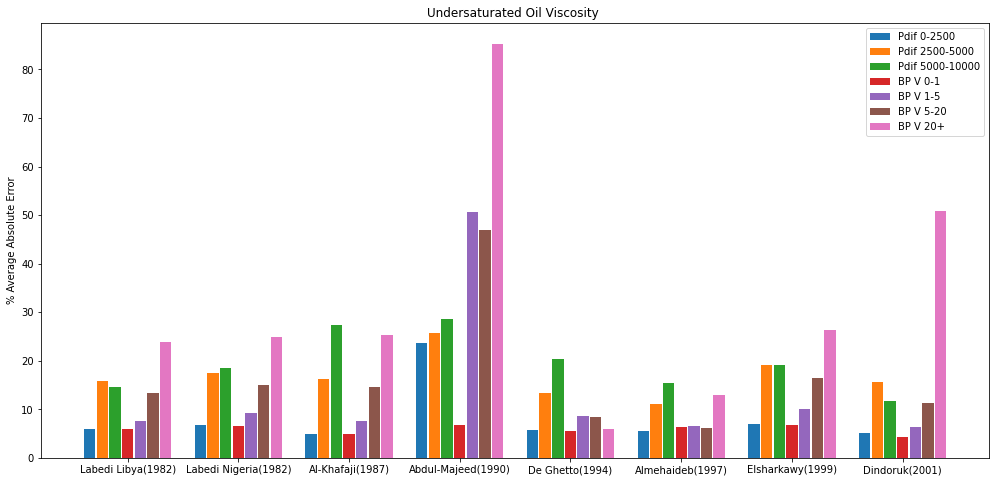

In [24]:
press_0_25 = totaldf.loc[(totaldf.ΔP<2500)]
press_25_50 = totaldf.loc[(totaldf.ΔP<5000)&(totaldf.ΔP>2500)]
press_50_100 = totaldf.loc[(totaldf.ΔP<10000)&(totaldf.ΔP>5000)]
visc_0_1 = totaldf.loc[(totaldf.μob>0) & (totaldf.μob<1)]
visc_1_5 = totaldf.loc[(totaldf.μob>1) & (totaldf.μob<5)]
visc_5_20 = totaldf.loc[(totaldf.μob>5) & (totaldf.μob<20)]
visc_20_plus = totaldf.loc[(totaldf.μob>20) ]

full_data = {
    'Pdif 0-2500' : Stats_matrix(press_0_25).iloc[:,2],
    'Pdif 2500-5000' : Stats_matrix(press_25_50).iloc[:,2],
    'Pdif 5000-10000' : Stats_matrix(press_50_100).iloc[:,2],
    'BP V 0-1' : Stats_matrix(visc_0_1).iloc[:,2],
    'BP V 1-5' : Stats_matrix(visc_1_5).iloc[:,2],
    'BP V 5-20' : Stats_matrix(visc_5_20).iloc[:,2],
    'BP V 20+' : Stats_matrix(visc_20_plus).iloc[:,2],
}    
models =  ['Labedi Libya(1982)','Labedi Nigeria(1982)','Al-Khafaji(1987)','Abdul-Majeed(1990)','De Ghetto(1994)','Almehaideb(1997)','Elsharkawy(1999)','Dindoruk(2001)']



%run my_bar_plot.ipynb
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (17, 8)
bar_plot(ax, full_data, total_width=.8, single_width=.9,)
plt.xticks(range(8), models)
plt.title('Undersaturated Oil Viscosity ')
plt.ylabel("% Average Absolute Error")